# Predictive LLM Model for WhatsApp Conversations

Impot required liabraries

In [1]:
import zipfile
import pandas as pd
import os
from google.colab import files

In [2]:
uploaded = files.upload()
zip_name = list(uploaded.keys())[0]

Saving WhatsApp Chat with Tayba Khaqan.zip to WhatsApp Chat with Tayba Khaqan.zip


Extract files

In [3]:
with zipfile.ZipFile(zip_name, 'r') as z:
    z.extractall("whatsapp_chat")

print("Extracted files:", os.listdir("whatsapp_chat"))

Extracted files: ['Evolution ConFerence.vcf', 'WhatsApp Chat with Tayba Khaqan.txt']


Folder Creation

In [4]:
extract_folder = '/content/whatsapp_chats'
os.makedirs(extract_folder, exist_ok=True)

In [5]:
# Extract the ZIP
with zipfile.ZipFile(zip_name, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

In [6]:
os.listdir(extract_folder)

['Evolution ConFerence.vcf', 'WhatsApp Chat with Tayba Khaqan.txt']

In [7]:
chat_files = [os.path.join(extract_folder, f)
              for f in os.listdir(extract_folder)
              if f.endswith('.txt')]

chat_files


['/content/whatsapp_chats/WhatsApp Chat with Tayba Khaqan.txt']

In [8]:
['/content/whatsapp_chats/WhatsApp Chat with Tayba Khaqan.txt']


['/content/whatsapp_chats/WhatsApp Chat with Tayba Khaqan.txt']

Whatsapp chat Parser (Removing Emojies for better response)

In [9]:
!pip install emoji -q
import emoji
import pandas as pd
import re

def remove_emojis(text):
    if isinstance(text, str):
        return emoji.replace_emoji(text, replace='')  # replace all emojis with empty string
    return text

def parse_whatsapp_chat(chat_file_path):
    data = []
    with open(chat_file_path, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if not line:
                continue

            match = re.match(
                r'^(\d{1,2}/\d{1,2}/\d{2,4}), (\d{1,2}:\d{2}(?:\s?[ap]m)?) - (.*?): (.*)$',
                line,
                re.IGNORECASE
            )

            if match:
                date_str, time_str, sender, message = match.groups()
                timestamp_str = f"{date_str} {time_str}"
                try:
                    date = pd.to_datetime(timestamp_str, dayfirst=True, errors='coerce')
                except:
                    date = None

                # Remove emojis
                message = remove_emojis(message)
                data.append([date, sender, message])
            else:
                if data:
                    data[-1][2] += '\n' + remove_emojis(line)

    df = pd.DataFrame(data, columns=['Date', 'Sender', 'Message'])

    # Anonymize senders
    unique_senders = df['Sender'].unique()
    sender_map = {name: f'Person {i+1}' for i, name in enumerate(unique_senders)}
    df['Sender'] = df['Sender'].map(sender_map)

    return df


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 13.7 MB/s eta 0:00:00


getting all.text files in folder

In [10]:
chat_files = [os.path.join(extract_folder, f) for f in os.listdir(extract_folder) if f.endswith('.txt')]
chat_files


['/content/whatsapp_chats/WhatsApp Chat with Tayba Khaqan.txt']

Parse each chat and combine to data frame

In [11]:
df_list = [parse_whatsapp_chat(f) for f in chat_files]
df_chats = pd.concat(df_list, ignore_index=True)


Preview

In [12]:
df_chats.head(10)

,Date,Sender,Message
0,2023-05-25 18:54:00,Person 1,Falak
1,2023-05-25 18:54:00,Person 2,Jeeee
2,2023-05-25 18:54:00,Person 1,Kal jaogy?
3,2023-05-25 18:55:00,Person 2,Yrrr nahi pata abhi kisi ka cnfrm nahi h
4,2023-05-25 18:55:00,Person 2,Me puchti hu in se ruko
5,2023-05-25 18:55:00,Person 1,Okieee
6,2023-06-26 14:59:00,Person 1,Beautiful
7,2023-08-21 10:26:00,Person 2,Tayaba
8,2023-08-21 11:18:00,Person 1,Han jeee
9,2023-11-02 11:33:00,Person 1,Preetttyy youuuuu


Saving Csv File

In [13]:
csv_path = '/content/Mychat-clean-data.csv'
df_chats.to_csv(csv_path, index=False)
print(f"CSV saved at: {csv_path}")

CSV saved at: /content/Mychat-clean-data.csv


# Exploratory Data Analysis

Load & preprocess dataset

In [14]:
# Load your CSV
df = pd.read_csv('/content/Mychat-clean-data.csv') # just simple clean in CSV format daatset
df.head()

,Date,Sender,Message
0,2023-05-25 18:54:00,Person 1,Falak
1,2023-05-25 18:54:00,Person 2,Jeeee
2,2023-05-25 18:54:00,Person 1,Kal jaogy?
3,2023-05-25 18:55:00,Person 2,Yrrr nahi pata abhi kisi ka cnfrm nahi h
4,2023-05-25 18:55:00,Person 2,Me puchti hu in se ruko


Basic Info

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     706 non-null    object
 1   Sender   706 non-null    object
 2   Message  653 non-null    object
dtypes: object(3)
memory usage: 16.7+ KB


Checking Missing Values

In [16]:
df.isnull().sum()

,0
Date,0
Sender,0
Message,53


In [17]:
df.duplicated().sum()

np.int64(126)

Message Counts

Message counts by sender:
 Sender
Person 2    356
Person 1    350
Name: count, dtype: int64


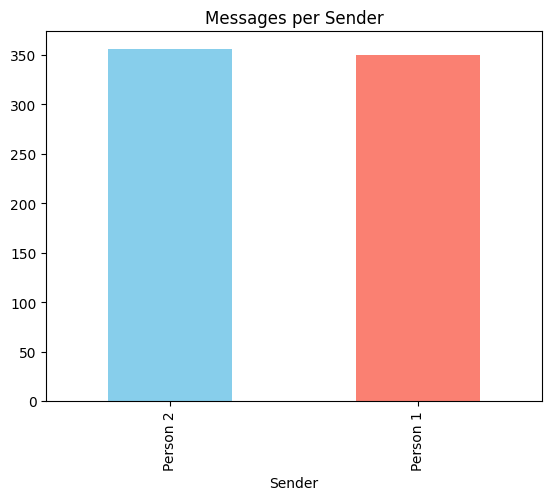

In [18]:
# Message Counts by Sender

sender_counts = df['Sender'].value_counts()
print("Message counts by sender:\n", sender_counts)

# Optional: plot
import matplotlib.pyplot as plt

sender_counts.plot(kind='bar', title='Messages per Sender', color=['skyblue','salmon'])
plt.show()


Total Number of messages

In [19]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Mychat-clean-data.csv')

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Number of messages and unique senders
print("Total messages:", len(df))




Total messages: 706


Unique Senders

In [20]:
print("Unique senders:", df['Sender'].nunique())

Unique senders: 2


Checking Message Length

Average message length: 3.728045325779037
Longest message length: 29
Shortest message length: 1


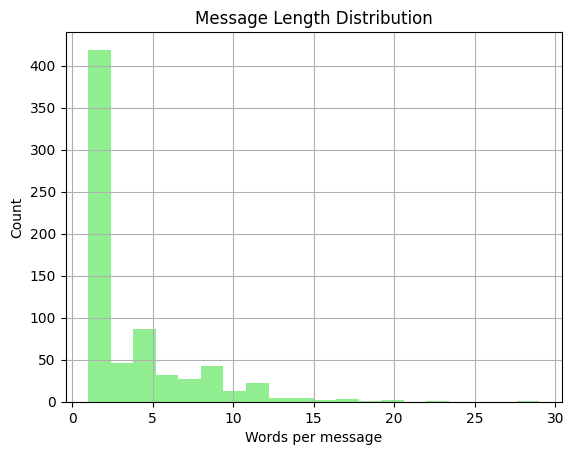

In [21]:
# Message Lengths
import matplotlib.pyplot as plt

# Add message length in words
df['msg_len'] = df['Message'].astype(str).str.split().apply(len)

print("Average message length:", df['msg_len'].mean())
print("Longest message length:", df['msg_len'].max())
print("Shortest message length:", df['msg_len'].min())

# Histogram
df['msg_len'].hist(bins=20, color='lightgreen')
plt.title("Message Length Distribution")
plt.xlabel("Words per message")
plt.ylabel("Count")
plt.show()

Messges per month

<Axes: xlabel='Month'>

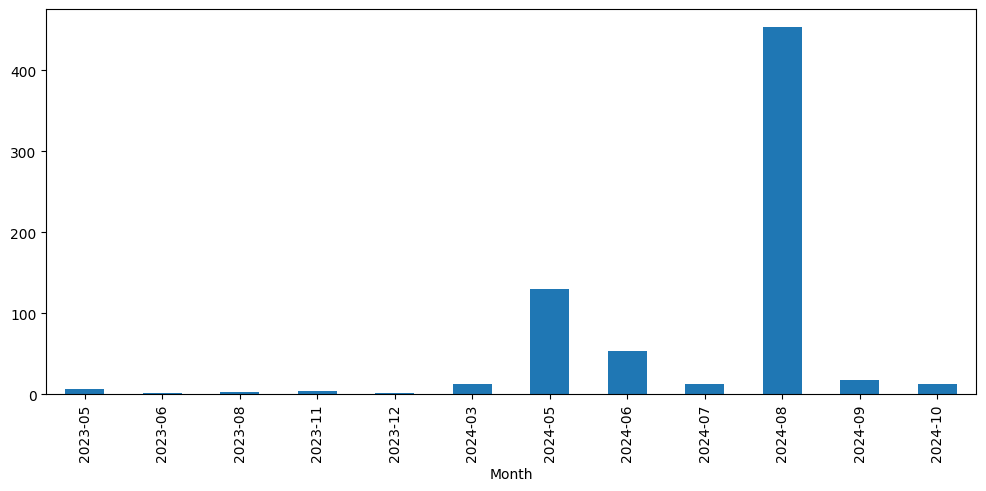

In [22]:
df['Month'] = df['Date'].dt.to_period('M')
df['Month'].value_counts().sort_index().plot(kind='bar', figsize=(12,5))


Most frequent words

In [23]:
# Most Frequent Words

from collections import Counter
import re

# Combine all messages
all_msgs = ' '.join(df['Message'].astype(str))

# Clean and split words
words = [w.lower() for w in re.findall(r'\w+', all_msgs)]
word_counts = Counter(words)

# Most common words
print("Top 20 words:", word_counts.most_common(20))

Top 20 words: [('media', 172), ('omitted', 172), ('h', 53), ('nan', 53), ('hai', 51), ('k', 43), ('nhi', 37), ('to', 37), ('ye', 37), ('hi', 33), ('kia', 29), ('or', 27), ('bs', 27), ('me', 25), ('hn', 25), ('m', 23), ('wo', 20), ('n', 19), ('se', 18), ('phir', 17)]


Active Chat dates

In [24]:
df['Date Only'] = df['Date'].dt.date
df['Date Only'].value_counts().head(10)


,count
Date Only,
2024-05-23,88
2024-08-20,86
2024-08-18,68
2024-08-17,56
2024-08-05,54
2024-08-19,54
2024-08-07,53
2024-08-04,52
2024-06-27,31


Messages Per Day

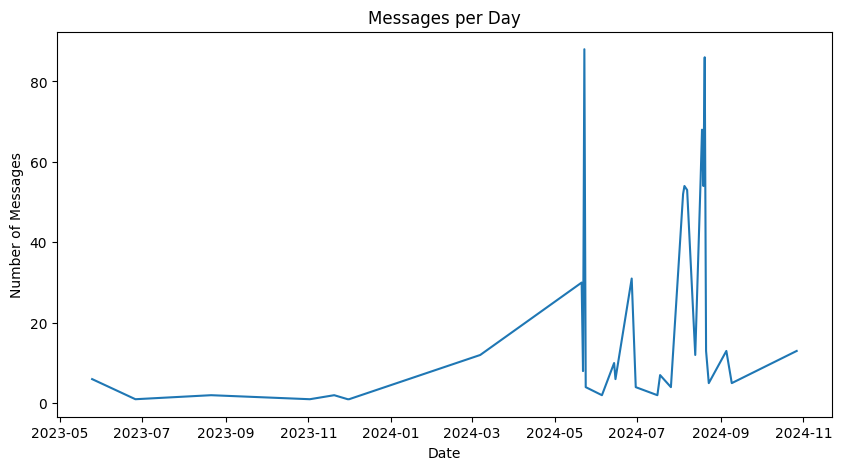

In [25]:
# Messages Over Time

# Messages per day
df['date_only'] = df['Date'].dt.date
daily_counts = df.groupby('date_only').size()

daily_counts.plot(kind='line', figsize=(10,5), title='Messages per Day')
plt.xlabel("Date")
plt.ylabel("Number of Messages")
plt.show()


Enviorment  Setup

## Predictive Model (`openai/gpt-oss-20b`) with RAG

In [26]:
#  Setup
!pip install pandas matplotlib seaborn sentence-transformers faiss-cpu sacrebleu rouge-score groq


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.9/134.9 kB 12.1 MB/s eta 0:00:00
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=37b893a7ba407ddb4039b901c0d8d026ac806ff9052bc6c616c9ff96924a40ae
  Stored in directory: /root/.cache/pip/wheels/85/9d/af/01feefbe7d55ef5468796f0c68225b6788e85d9d0a281e7a70
Successfully built rouge-score


In [27]:

import pandas as pd
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
import faiss
from groq import Groq

Load Dataset

In [28]:

df = pd.read_csv("/content/Mychat-clean-data.csv", parse_dates=['Date'])
print(df.head())

                 Date    Sender                                   Message
0 2023-05-25 18:54:00  Person 1                                     Falak
1 2023-05-25 18:54:00  Person 2                                     Jeeee
2 2023-05-25 18:54:00  Person 1                                Kal jaogy?
3 2023-05-25 18:55:00  Person 2  Yrrr nahi pata abhi kisi ka cnfrm nahi h
4 2023-05-25 18:55:00  Person 2                   Me puchti hu in se ruko


Convert to datetime and keep only the date part

In [29]:

df["Date"] = pd.to_datetime(df["Date"]).dt.date
df

,Date,Sender,Message
0,2023-05-25,Person 1,Falak
1,2023-05-25,Person 2,Jeeee
2,2023-05-25,Person 1,Kal jaogy?
3,2023-05-25,Person 2,Yrrr nahi pata abhi kisi ka cnfrm nahi h
4,2023-05-25,Person 2,Me puchti hu in se ruko
...,...,...,...
701,2024-10-27,Person 1,Hahah mara azaab hi dal diya hai
702,2024-10-27,Person 1,Inho ne
703,2024-10-27,Person 2,<Media omitted>
704,2024-10-27,Person 1,Achaa hamain to nhi di


 Embeddings + Retrieval (FAISS) ---

In [39]:
# Prepare data for RAG
pairs = []
for i in range(1, len(df)):
    if df.loc[i, 'Sender'] != df.loc[i-1, 'Sender']:  # only cross-turn pairs
        context = df.loc[i-1, 'Message']
        reply = df.loc[i, 'Message']
        pairs.append([context, reply, df.loc[i, 'Sender']])

pairs_df = pd.DataFrame(pairs, columns=['context', 'reply', 'reply_sender'])

# Drop rows with NaN values in 'context' or 'reply'
pairs_df.dropna(subset=['context', 'reply'], inplace=True)

model = SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2")
context_embs = model.encode(pairs_df['context'].tolist(), convert_to_numpy=True)

index = faiss.IndexFlatIP(context_embs.shape[1])
faiss.normalize_L2(context_embs)
index.add(context_embs)

def retrieve(query, k=5):  # increased k for stronger grounding
    q_emb = model.encode([query], convert_to_numpy=True)
    faiss.normalize_L2(q_emb)
    D,I = index.search(q_emb, k)
    return pairs_df.iloc[I[0]]

In [55]:
pairs_df

,context,reply,reply_sender
0,Falak,Jeeee,Person 2
1,Jeeee,Kal jaogy?,Person 1
2,Kal jaogy?,Yrrr nahi pata abhi kisi ka cnfrm nahi h,Person 2
3,Me puchti hu in se ruko,Okieee,Person 1
4,Beautiful,Tayaba,Person 2
...,...,...,...
330,Okay,Kuch kehnq thqq,Person 2
331,Kuch kehnq thqq,Wohi approval pages k print yar,Person 1
333,Me b isi m lgi v k kisi se kerwa lu,Hahah mara azaab hi dal diya hai,Person 1
334,Inho ne,<Media omitted>,Person 2


Connect Groq

In [51]:
# --- 6. Connect Groq ---
from google.colab import userdata
GROQ_API_KEY = userdata.get('GROQAPI')
client = Groq(api_key=GROQ_API_KEY)

Updated Predict Function

In [52]:

def predict_reply(user_message, persona="Person 2"):
    retrieved = retrieve(user_message, k=5)

    # Stronger system instruction
    messages = [
        {
          "role": "system",
          "content": (
              f"You are {persona}. Reply casually like WhatsApp chats, "
              "using short Roman Urdu + English mix. "
              "Never sound like an AI assistant, keep it natural."
          )
        }
    ]

    # Anchor example (manual few-shot)
    messages.append({"role": "user", "content": "Kal jaogy?"})
    messages.append({"role": "assistant", "content": "Nahi pta abhi, dekhti hu"})

    # Retrieved examples
    for _, row in retrieved.iterrows():
        messages.append({"role": "user", "content": row['context']})
        messages.append({"role": "assistant", "content": row['reply']})

    # Current user message
    messages.append({"role": "user", "content": user_message})

    comp = client.chat.completions.create(
        model="openai/gpt-oss-20b",
        messages=messages,
        temperature=0.3,  # lower = less generic
        max_completion_tokens=128
    )
    return comp.choices[0].message.content

Checking Diversity

In [58]:
import nltk
from collections import Counter
import sacrebleu
from rouge_score import rouge_scorer

# Generate predictions if they don't exist
try:
    preds
except NameError:
    print("Generating predictions...")
    sample = pairs_df.sample(50)
    preds, refs = [], []
    for _,row in sample.iterrows():
        preds.append(predict_reply(row['context'], persona=row['reply_sender']))
        refs.append(row['reply'])


all_tokens = " ".join(preds).split()
bigrams = list(nltk.bigrams(all_tokens))
print("Unique unigrams:", len(set(all_tokens)))
print("Unique bigrams:", len(set(bigrams)))

Unique unigrams: 55
Unique bigrams: 67


In [59]:
# # Embedding Similarity (better for chats)

# from sklearn.metrics.pairwise import cosine_similarity

# def embedding_similarity(preds, refs):
#     pred_emb = model.encode(preds, convert_to_numpy=True)
#     ref_emb = model.encode(refs, convert_to_numpy=True)
#     sims = [cosine_similarity([p],[r])[0][0] for p,r in zip(pred_emb, ref_emb)]
#     return sum(sims) / len(sims)

# # Sample evaluation
# sample = pairs_df.sample(50)
# preds, refs = [], []
# for _, row in sample.iterrows():
#     preds.append(predict_reply(row['context'], persona=row['reply_sender']))
#     refs.append(row['reply'])

# avg_sim = embedding_similarity(preds, refs)
# print("Average Embedding Similarity:", avg_sim)


In [61]:

import sacrebleu
from rouge_score import rouge_scorer

sample = pairs_df.sample(50)
preds, refs = [], []
for _,row in sample.iterrows():
    preds.append(predict_reply(row['context'], persona=row['reply_sender']))
    refs.append(row['reply'])

bleu = sacrebleu.corpus_bleu(preds, [refs])
scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)
rouges = [scorer.score(r, p)['rougeL'].fmeasure for r,p in zip(refs,preds)]

print("BLEU:", bleu.score)
print("ROUGE-L:", sum(rouges)/len(rouges))

BLEU: 0.41889150657765434
ROUGE-L: 0.010870967741935487


Testing

In [62]:

def chat_with_model(persona="Person 2"):
    print("🤖 Chatbot ready! (type 'quit' to stop)\n")
    while True:
        user_inp = input("You: ")
        if user_inp.lower() in ["quit", "exit"]:
            print("Chatbot: Bye! 👋")
            break
        reply = predict_reply(user_inp, persona=persona)
        print(f"{persona}: {reply}\n")

# Run chatbot
chat_with_model("Person 2")

🤖 Chatbot ready! (type 'quit' to stop)

You: meri cat bhag gai h
Person 2: Arre yaar, cat bhag gayi? 😱

1. **Jaldi se search karo** – ghar ke andar, balcony, garden, aur aas-paas ke ghar.  
2. **Call kare** – “Kitty, aao yahan!”

You: hahhaha
Person 2: Hahaha, yeh toh maza aa gaya! 😄

You: oh yeahhhh
Person 2: Haan, kya baat?

You: exit
Chatbot: Bye! 👋
